In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/fahimafridi/downloads/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,433


In [5]:
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Month          0
#Passengers    0
dtype: int64


In [6]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

In [7]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [8]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.describe()

,Passengers
count,144.000000
mean,280.305556
std,119.975188
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


array([<Axes: xlabel='Month'>], dtype=object)

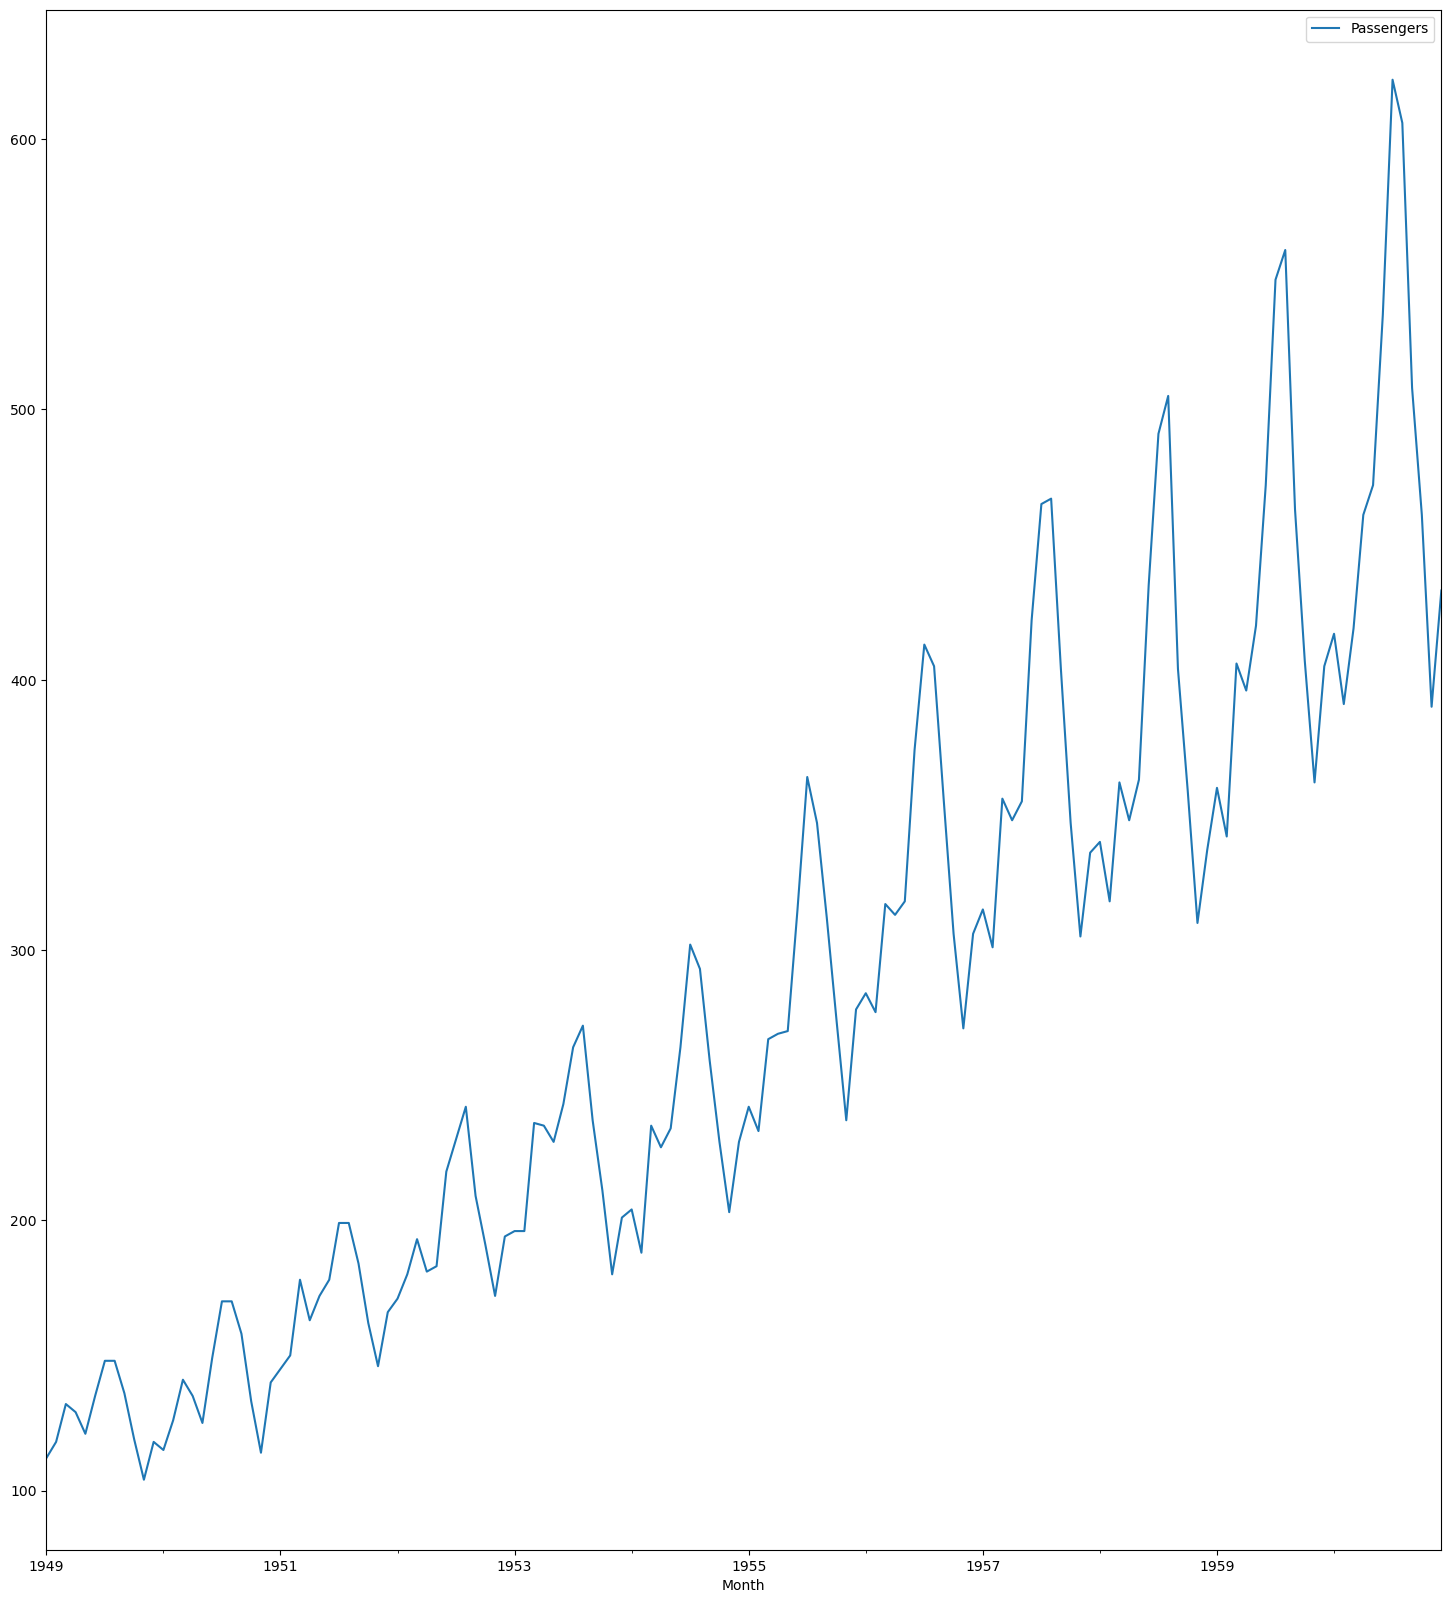

In [10]:
df.plot(figsize=(18,20),subplots=True)

In [11]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(feature):
    result=adfuller(feature)
    print('p-value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis indicating it is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [12]:
#Testing For Stationarity for temp
adfuller_test(df['Passengers'])

p-value : 0.9920653980124211
weak evidence against null hypothesis, indicating it is non-stationary 


# Differencing

In [13]:
df['Passengers 1st Difference'] = df['Passengers'] - df['Passengers'].shift(1)

In [14]:
#Testing For Stationarity for temp
adfuller_test(df['Passengers 1st Difference'].dropna())

p-value : 0.05490387989209521
weak evidence against null hypothesis, indicating it is non-stationary 


In [15]:
df['Passengers 2nd Difference'] = df['Passengers'] - df['Passengers'].shift(2)

In [16]:
#Testing For Stationarity for temp
adfuller_test(df['Passengers 2nd Difference'].dropna())

p-value : 0.03916597254932509
strong evidence against the null hypothesis(Ho), reject the null hypothesis indicating it is stationary


<Axes: xlabel='Month'>

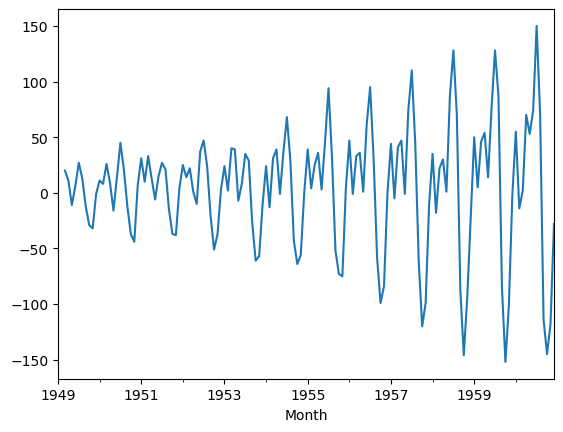

In [17]:
df['Passengers 2nd Difference'].plot()

p-value : 0.011642299688805017
strong evidence against the null hypothesis(Ho), reject the null hypothesis indicating it is stationary


<Axes: xlabel='Month'>

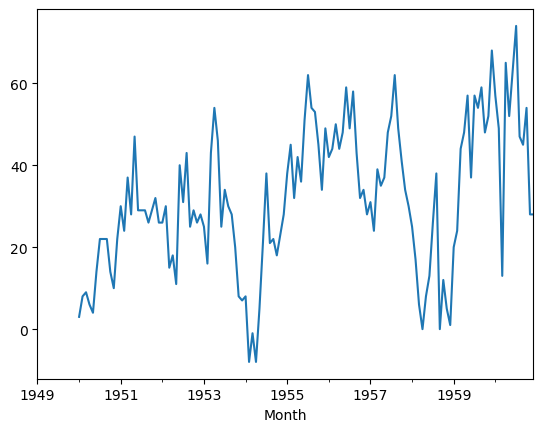

In [18]:
df['Passengers seasonal Difference'] = df['Passengers'] - df['Passengers'].shift(12)
#Testing For Stationarity for temp
adfuller_test(df['Passengers seasonal Difference'].dropna())
df['Passengers seasonal Difference'].plot()

Auto Regression Models

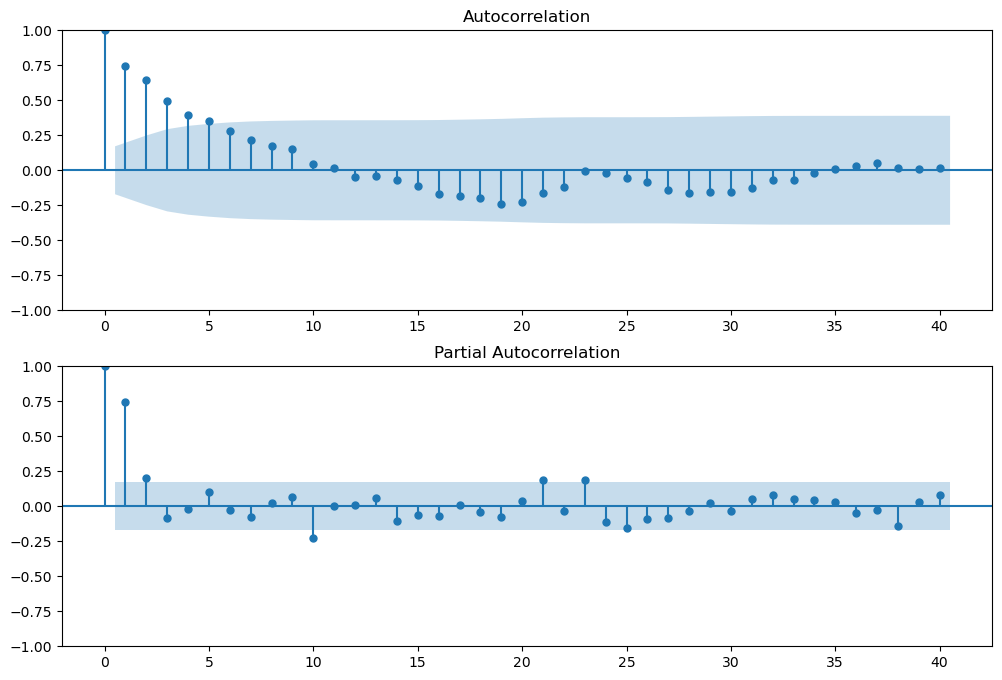

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Passengers seasonal Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Passengers seasonal Difference'].iloc[13:],lags=40,ax=ax2)

/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

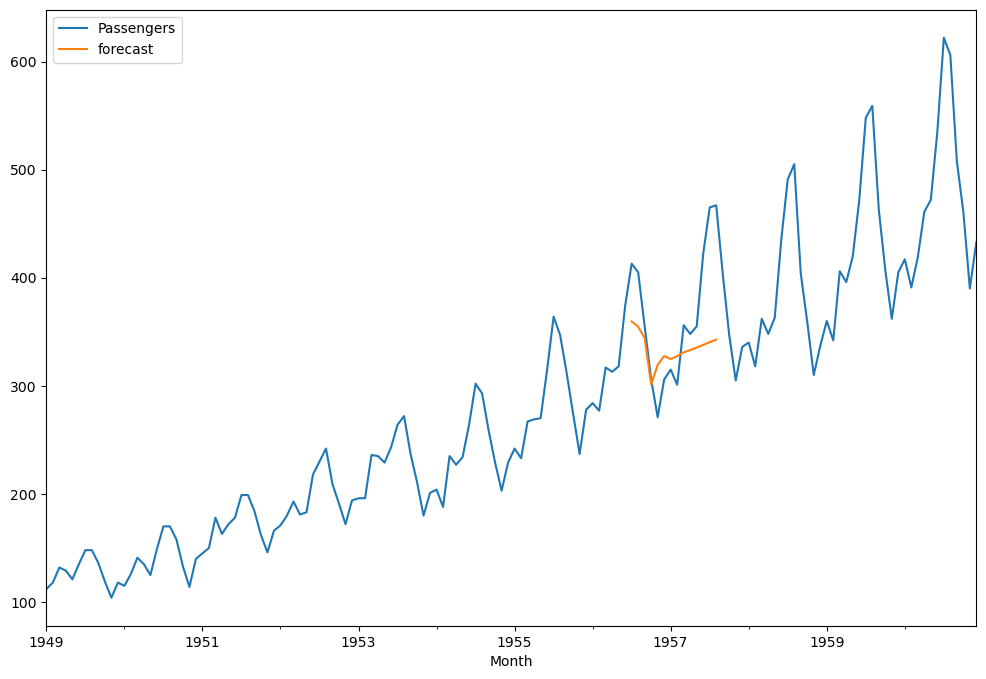

In [20]:
from statsmodels.tsa.arima.model import ARIMA
# p=2, d=2, q=5
model = ARIMA(df['Passengers'], order=(2, 2, 5))
model_fit = model.fit()
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91072D+00    |proj g|=  6.34390D-01


 This problem is unconstrained.



At iterate    5    f=  3.34893D+00    |proj g|=  2.52557D-02

At iterate   10    f=  3.22615D+00    |proj g|=  6.25223D-02

At iterate   15    f=  3.21945D+00    |proj g|=  5.60115D-03

At iterate   20    f=  3.21853D+00    |proj g|=  9.91595D-03

At iterate   25    f=  3.21645D+00    |proj g|=  4.99572D-03

At iterate   30    f=  3.21603D+00    |proj g|=  3.62064D-03

At iterate   35    f=  3.21590D+00    |proj g|=  1.22259D-03

At iterate   40    f=  3.21588D+00    |proj g|=  6.53460D-04

At iterate   45    f=  3.21584D+00    |proj g|=  7.90200D-04


/Users/fahimafridi/anaconda3/envs/cv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.21583D+00    |proj g|=  3.29644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     54      1     0     0   3.296D-04   3.216D+00
  F =   3.2158254491748104     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<Axes: xlabel='Month'>

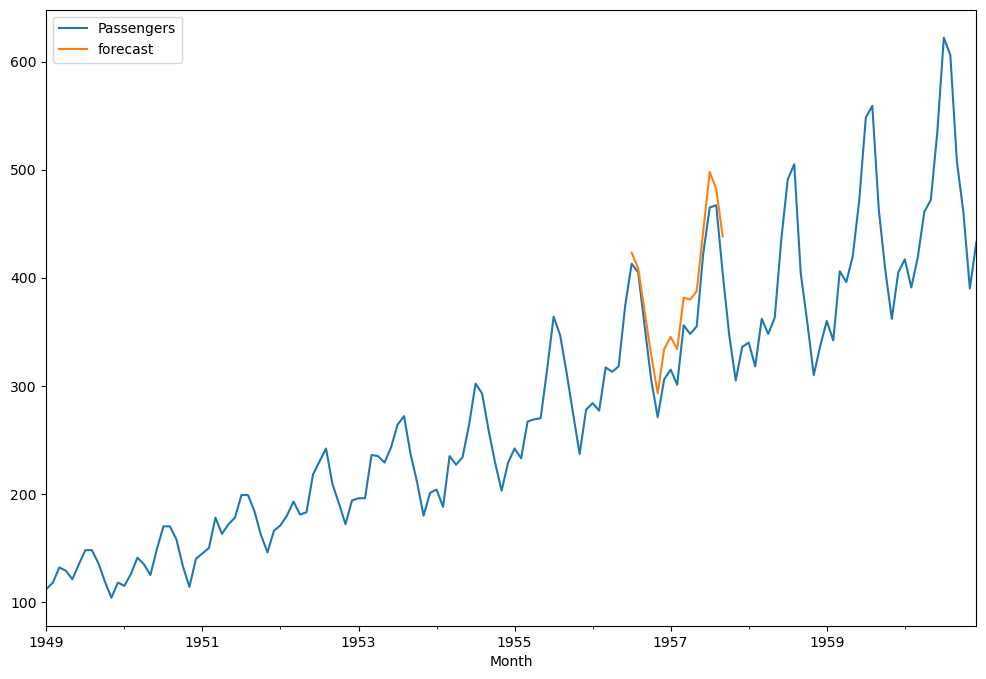

In [28]:
import statsmodels.api as sm

# Specify the SARIMA model based on your observations
model = sm.tsa.statespace.SARIMAX(df['Passengers'], 
                                  order=(2, 2, 5),  # Non-seasonal order (p, d, q)
                                  seasonal_order=(2, 2, 5, 12))  # Seasonal order (P, D, Q, s)

model_fit = model.fit()
df['forecast'] = model_fit.predict(start=90, end=104, dynamic=True)

# Plot the original Passengers and the forecasted values
df[['Passengers', 'forecast']].plot(figsize=(12, 8))

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns) 


In [31]:
future_df=pd.concat([df,future_datest_df])


In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [33]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

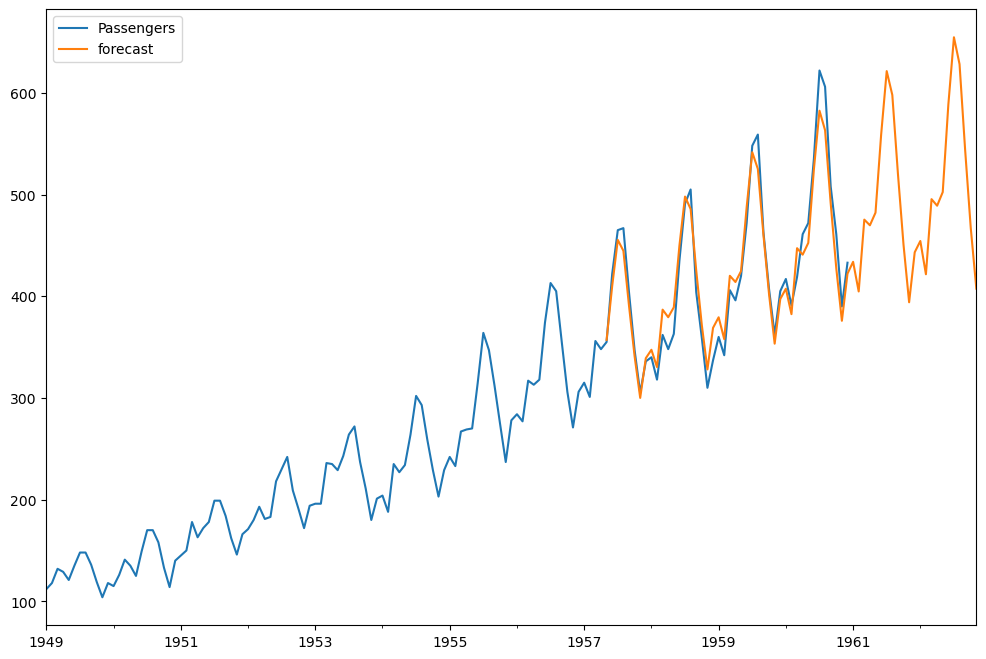

In [34]:
future_df['forecast'] = model_fit.predict(start = 100, end = 200, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8)) 

### 